PyQC includes prototype support for states represented in the stabilizer formalism, and evaluation of stabilizer circuits on those states.  The implementation is based on the ["CHP"](http://www.scottaaronson.com/chp/) algorithm by Aaronson and Goettsman ([arXiv:quant-ph/0406196](http://arxiv.org/abs/quant-ph/0406196)).

Stabilizer states are represented in PyQC by the `StabilizerState` class, which is used as an alternative to the `Ket` class in operations.  Currently, the `StabilizerState` constructor takes a single argument--the number of qubits represented by the state--and returns a state initialized to the all zeros state:

In [1]:
from pyqc import *

s = StabilizerState(2)

In [2]:
s

+ZI
+IZ

`StabilizerState` instances are represented by the elements in the $n$-qubit Pauli group $ \mathcal{P}_n $ that generate the group of *stabilizers* for the quantum state in question.  In principle this representation could then be converted to the state vector representation--and in fact that capability *will* be added--but the advantage of the stabilizer representation is that it can represent stabilizer states for a large number of qubits efficiently on a classical computer.  Whereas, for example, an arbitrary 1024-qubit state would require an unthinkable amount of space to represent as a vector (at least $ 2^1024 $ bits), the equivalent `StabilizerState` requires only about 12292 bits in the current implementation (and could be made to use even slightly less space).

This formalism does come with certain limitations, but it is still useful for a broad class of problems, especially in quantum error correction.

The current prototype implementation of `StabilizerState` supports application of the Hadamard, phase, and CNOT gates, as well as the identity (trivially) and Pauli X, Y, and Z gates since they can be easily decomposed into a combination of Hadmard, phase, and CNOT gates.

As mentioned earlier, within these limitations, `StabilizerState` objects can be used in PyQC in the same way as `Ket` objects:

In [3]:
X|Ket(0)

|1>

In [4]:
X|StabilizerState(1)

-Z

It is easy to check that $ -Z $ generates the set $ \{I, -Z\} $ which clearly stabilizes $ |1\rangle $.

Let's look at a two qubit case:

In [5]:
CNOT|Ket(1, 0)

|1, 1>

For the stabilizer we first have to prepare the `StabilizerState` in the state $ |10\rangle $ by applying $ X $ to the first qubit (in a later version state preparation of this sort will be simplified).  Then we apply the $ \text{CNOT} $:

In [6]:
CNOT|(X * I)|StabilizerState(2)

-ZI
+ZZ

The generator $ \langle-ZI, ZZ\rangle $ generates the set $ \{II, -IZ, -ZI, ZZ\} $, which it is easy to check is the stabilizer group for $ |11\rangle $.

It is also possible to read the `.chp` instruction files used by the original `chp` implementation into a `Circuit` object:

In [7]:
epr_chp = """\
Prepares an EPR pair |00>+|11> across qubits
0 and 1, then measures qubit 1.  The outcome
should be random.
#
h 0
c 0 1
m 1
"""

In [8]:
epr = Circuit.from_chp(epr_chp)

In [9]:
print(epr.description)

Prepares an EPR pair |00>+|11> across qubits
0 and 1, then measures qubit 1.  The outcome
should be random.


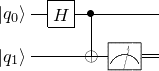

In [10]:
epr

In [11]:
epr|StabilizerState(2)

+IZ
+ZZ

Because the outcome of the measurement is random, this may have a different result each time you run it (either $ \langle IZ, ZZ \rangle $ or $ \langle -IZ, ZZ \rangle $).

Measurements on stabilizer states *are* supported, as the above example shows.  But there is currently no side-channel provided by the API to obtain the actual measurement results!  Clearly, this is on the to do list.